In [1]:
import numpy as np
import skimage as sk
import skimage.io as skio
import matplotlib.pyplot as plt
from scipy.signal import convolve2d, gaussian
import cv2

In [2]:
# name of the input files
imname = 'IMG_3192.jpeg'
imname2 = 'IMG_3380-preview.jpeg'
maskname = 'mask.jpeg'

# read in the images
im = skio.imread(imname)
im2 = skio.imread(imname2)
mask = skio.imread(maskname)

# convert to double (might want to do this later on to save memory)
im = sk.img_as_float(im)
im2 = sk.img_as_float(im2)
mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
mask = sk.img_as_float(mask)

In [3]:
def G(image, size, std):
    gaussian_kernel = gaussian(size, std)
    gaussian_kernel /= np.sum(gaussian_kernel)
    gaussian_kernel = np.outer(gaussian_kernel, np.transpose(gaussian_kernel))

    return convolve2d(image, gaussian_kernel, "same")

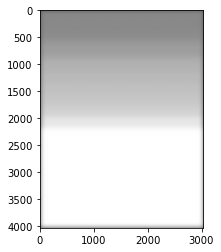

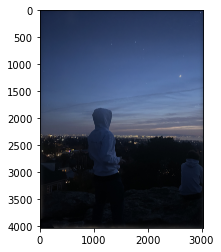

In [4]:
# blur mask for smoother blending
# mask = G(mask, 211, 42.2)

min = np.min(mask)
max = np.max(mask)
mask = mask + 1 - max
mask = np.clip(mask, 0, 1)

# save new mask
mask = np.dstack([mask, mask, mask])
plt.imshow(mask)
plt.show()
fname = 'mask.jpeg'
plt.imsave(fname, mask)

# compute blended image
out = im * (1 - mask) + im2 * mask

plt.imshow(out)
plt.show()
fname = 'out_path/blended.jpeg'
plt.imsave(fname, out)